In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

# application_data

In [3]:
#Load the applications dataset
df_app = pd.read_csv("D:\\upGrad\\DS\\Assignments\\Assignment-2\\application_data.csv")

# Problem Statement 1
## Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [4]:
#Print head of the data
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Print shape of the application dataset
df_app.shape

(307511, 122)

In [6]:
# Print the summary of the dataframe
df_app.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
#Print info of the application data
df_app.iloc[:,100:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_DOCUMENT_6             307511 non-null  int64  
 1   FLAG_DOCUMENT_7             307511 non-null  int64  
 2   FLAG_DOCUMENT_8             307511 non-null  int64  
 3   FLAG_DOCUMENT_9             307511 non-null  int64  
 4   FLAG_DOCUMENT_10            307511 non-null  int64  
 5   FLAG_DOCUMENT_11            307511 non-null  int64  
 6   FLAG_DOCUMENT_12            307511 non-null  int64  
 7   FLAG_DOCUMENT_13            307511 non-null  int64  
 8   FLAG_DOCUMENT_14            307511 non-null  int64  
 9   FLAG_DOCUMENT_15            307511 non-null  int64  
 10  FLAG_DOCUMENT_16            307511 non-null  int64  
 11  FLAG_DOCUMENT_17            307511 non-null  int64  
 12  FLAG_DOCUMENT_18            307511 non-null  int64  
 13  FLAG_DOCUMENT_

In [8]:
# print descriptive statistics of the application dataset
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,...,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,...,0.00813,0.00060,0.00051,0.00033,0.00640,0.00700,0.03436,0.26740,0.26547,1.89997
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,4363.98863,141275.76652,...,0.08980,0.02439,0.02252,0.01830,0.08385,0.11076,0.20468,0.91600,0.79406,1.86929
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,-25229.00000,-17912.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,-19682.00000,-2760.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,0.01885,-15750.00000,-1213.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,0.02866,-12413.00000,-289.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7489.00000,365243.00000,...,1.00000,1.00000,1.00000,1.00000,4.00000,9.00000,8.00000,27.00000,261.00000,25.00000


In [9]:
#Print missing percentage of the columns
df_missing = pd.DataFrame(df_app.isnull().sum() * 100 / len(df_app))
df_missing

,0
SK_ID_CURR,0.00000
TARGET,0.00000
NAME_CONTRACT_TYPE,0.00000
CODE_GENDER,0.00000
FLAG_OWN_CAR,0.00000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.50163
AMT_REQ_CREDIT_BUREAU_WEEK,13.50163
AMT_REQ_CREDIT_BUREAU_MON,13.50163
AMT_REQ_CREDIT_BUREAU_QRT,13.50163


In [10]:
df_missing.reset_index(inplace=True)

In [11]:
#Find columns where missing percentage is greater than equal to 50
list_col = df_missing[df_missing[0] >= 50]

In [12]:
#Drop above columns
df_app.drop(columns=list_col.iloc[:, 0], axis=1, inplace=True)

In [13]:
#Check shape of data
df_app.shape

(307511, 81)

In [14]:
#Print columns where missing percentage is equal to or greater than 13 percent and less than 50 percent
df_missing[(df_missing[0] >= 13) & (df_missing[0] <50)]

,index,0
28,OCCUPATION_TYPE,31.34555
43,EXT_SOURCE_3,19.82531
46,YEARS_BEGINEXPLUATATION_AVG,48.78102
51,FLOORSMAX_AVG,49.76082
60,YEARS_BEGINEXPLUATATION_MODE,48.78102
65,FLOORSMAX_MODE,49.76082
74,YEARS_BEGINEXPLUATATION_MEDI,48.78102
79,FLOORSMAX_MEDI,49.76082
88,TOTALAREA_MODE,48.26852
90,EMERGENCYSTATE_MODE,47.39830


1. OCCUPATION_TYPE : The percentage of missing entries is 31.34555%. In this categorical variable there are 18 categories. Also, there is no clear relation between the missing values and the rest of the categories. Hence it will be recommended to create an others category to replace the missing values with.
  
2. EMERGENCYSTATE_MODE : The percentage of missing entries is 47.39830%. Here, the 'no' category is overwhelmingly higher than the the 'yes' category. So it will be safe to the replace the missing values with the mode i.e. "NO". 

3. YEARS_BEGINEXPLUATATION_MEDI : The percentage of missing entries is 48.78102%. As it is continuous numerical variable we can either impute the missing values with mean or median. Here the number of outliers is quite high hence it would be recommended to impute the missing values with the median.

4. TOTALAREA_MODE the percentage of missing entries is 48.26852%. Same as the above case there are a lot outliers. Hence in the same way we can impute the missing values with median value. 

5. AMT_REQ_CREDIT_BUREAU_YEAR : The percentage of missing entries is 13.50163%. As the percentage of missing values is low and also no clear relationship can be drawn between the missing values and the rest of the data. Hence we recommend to keep the data as it is. 



In [15]:
#Check for datatypes of the columns
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [16]:
#Change the negative values to their absolute values.
df_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = abs(df_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']])

In [17]:
#Create a new dataset with only numeric values
newdf = df_app.select_dtypes(include=['float64', 'int64'])
newdf.shape

(307511, 68)

In [18]:
# check if there is any negative value left in the data set
newdf[newdf.eq(lambda x : x <0)].sum()

SK_ID_CURR                   0.00000
TARGET                       0.00000
CNT_CHILDREN                 0.00000
AMT_INCOME_TOTAL             0.00000
AMT_CREDIT                   0.00000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY    0.00000
AMT_REQ_CREDIT_BUREAU_WEEK   0.00000
AMT_REQ_CREDIT_BUREAU_MON    0.00000
AMT_REQ_CREDIT_BUREAU_QRT    0.00000
AMT_REQ_CREDIT_BUREAU_YEAR   0.00000
Length: 68, dtype: float64

In [19]:
newdf[newdf.eq(lambda x : x <0)].sum().sum()

0.0

#### As the number values with negative value is equivalent to 0. Hence, there is no more negative value in the dataset.  

# Problem Statement 2
### Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

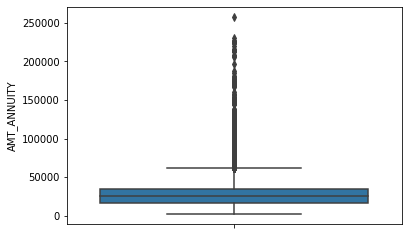

In [20]:
#Plot boxplot for AMT_ANNUITY 
sns.boxplot(y='AMT_ANNUITY', data=df_app)
plt.show()

In [21]:
#Describe the AMT_ANNUITY variable in df_app.
df_app.AMT_ANNUITY.describe()

count   307499.00000
mean     27108.57391
std      14493.73732
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

In [22]:
#Calculation of upper fence for AMT_ANNUITY
df_app.AMT_ANNUITY.describe()[6] + 1.5*(df_app.AMT_ANNUITY.describe()[6] - df_app.AMT_ANNUITY.describe()[4])

61704.0

In [23]:
#Calculation of total number of outliers.
len(df_app[df_app['AMT_ANNUITY'] > 61704])

7504

In [24]:
#Percentage of number of outliers
(7504/307499)*100

2.440333139294762

Here for the continuous variable 'AMT_ANNUITY' the min and the max values are 1615.5 and 258025.5 respectively. While the median is at 24903 and the upper fence (which is calculated by employing the above formula)  is at 61704. The total number of values that lie beyond this point are 7504 which are the outliers. Which is approximately 2.44% of the total values.

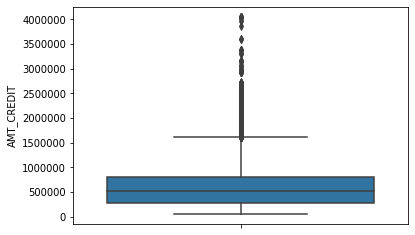

In [25]:
#Plot boxplot for AMT_CREDIT  
sns.boxplot(y='AMT_CREDIT', data=df_app)
plt.show()

In [26]:
#Describe the AMT_CREDIT variable in df_app.
df_app.AMT_CREDIT.describe()

count    307511.00000
mean     599025.99971
std      402490.77700
min       45000.00000
25%      270000.00000
50%      513531.00000
75%      808650.00000
max     4050000.00000
Name: AMT_CREDIT, dtype: float64

In [27]:
#Calculating the upper fence
df_app.AMT_CREDIT.describe()[6] + 1.5*(df_app.AMT_CREDIT.describe()[6] - df_app.AMT_CREDIT.describe()[4])

1616625.0

In [28]:
#Calculating total number of outliers.
len(df_app[df_app['AMT_CREDIT'] > 1616625.0])

6562

In [29]:
#Percentage of number of outliers
(6562/307511)*100

2.13390740493836

Here for the continuous variable 'AMT_CREDIT' the min and the max values are 45000 and 4050000 respectively. While the median is at 513531 and the upper fence (which is calculated by employing the above formula) is at 1616625. The total number of values that lie beyond this point are 6562 which are the outliers. Which is approximately 2.133% of the total values.

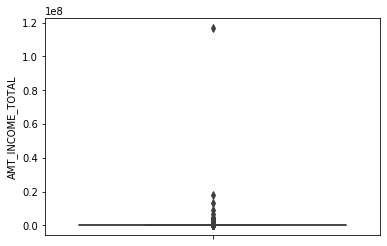

In [30]:
#Plot boxplot for AMT_INCOME_TOTAL 
sns.boxplot(y='AMT_INCOME_TOTAL', data=df_app)
plt.show()

In [31]:
#Describe the AMT_INCOME_TOTAL variable in df_app.
df_app.AMT_INCOME_TOTAL.describe()

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
#Calculating the upper fence
df_app.AMT_INCOME_TOTAL.describe()[6] + 1.5*(df_app.AMT_INCOME_TOTAL.describe()[6] - df_app.AMT_INCOME_TOTAL.describe()[4])

337500.0

In [33]:
#Calculating total number of outliers.
len(df_app[df_app['AMT_INCOME_TOTAL'] > 337500])

14035

In [34]:
#Percentage of number of outliers
(14035/307511)*100

4.564064374932929

Here for the continuous variable 'AMT_INCOME_TOTAL' the min and the max values are 25650 and 117000000 respectively. While the median is at 147150 and the upper fence (which is calculated by employing the above formula) is at 337500. The total number of values that lie beyond this point are 14035 which is quite high. Also there is a hugh difference between the upper fence and the max value.  While the percentage of number of outliers is at 4.56% of the total values.

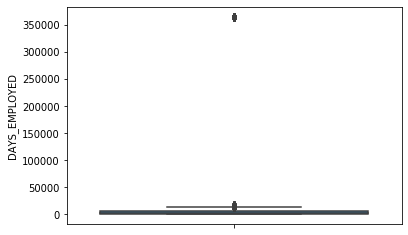

In [35]:
#Plot boxplot for DAYS_EMPLOYED  
sns.boxplot(y='DAYS_EMPLOYED', data=df_app)
plt.show()

In [36]:
#Describe the DAYS_EMPLOYED variable in df_app.
df_app.DAYS_EMPLOYED.describe()

count   307511.00000
mean     67724.74215
std     139443.75181
min          0.00000
25%        933.00000
50%       2219.00000
75%       5707.00000
max     365243.00000
Name: DAYS_EMPLOYED, dtype: float64

In [37]:
#Calculating the upper fence
df_app.DAYS_EMPLOYED.describe()[6] + 1.5*(df_app.DAYS_EMPLOYED.describe()[6] - df_app.DAYS_EMPLOYED.describe()[4])

12868.0

In [38]:
#Calculating total number of outliers.
len(df_app[df_app['DAYS_EMPLOYED'] > 12868.0])

56357

In [39]:
#Number of entries with an extremely high value 
len(df_app[df_app['DAYS_EMPLOYED'] == 365243.0])

55374

In [40]:
#Percentage of number of outliers
(56357/307511)*100

18.326824081089782

Here for the continuous variable 'DAYS_EMPLOYED' the min and the max values are 0 and 365243 respectively. While the median is at 2219 and the upper fence (which is calculated by employing the above formula) is at 12868. The total number of values that lie beyond this point are 56357 which is quite high.The percentage of number of outliers is at 18.32% of the total values. Here it is intersesting to note that the out of the 56537 outliers 55374 outliers have the same value i.e 365243. Which when converted into years is not logically possible. Hence, it is safe to say that the values are inappropriate.  

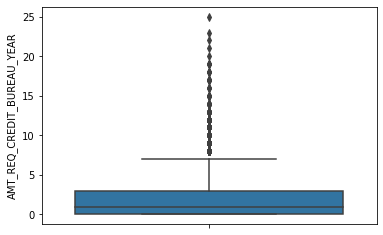

In [41]:
#Plot boxplot for AMT_REQ_CREDIT_BUREAU_YEAR
sns.boxplot(y='AMT_REQ_CREDIT_BUREAU_YEAR', data=df_app)
plt.show()

In [42]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [43]:
#Describe the AMT_REQ_CREDIT_BUREAU_YEAR variable in df_app.
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count   265992.00000
mean         1.89997
std          1.86929
min          0.00000
25%          0.00000
50%          1.00000
75%          3.00000
max         25.00000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [44]:
#Calculating the upper fence
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()[6] + 1.5*(df_app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()[6] - df_app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()[4])

7.5

In [45]:
#Calculating total number of outliers.
len(df_app[df_app['AMT_REQ_CREDIT_BUREAU_YEAR'] > 7.5])

3364

In [46]:
#Percentage of number of outliers
(3364/307511)*100

1.0939446068595922

Here for the continuous variable 'AMT_REQ_CREDIT_BUREAU_YEAR' the min and the max values are 0 and 25 respectively. While the median is at 1 and the upper fence (which is calculated by employing the above formula) is at 7.5. The total number of values that lie beyond this point are 3364.The percentage of number of outliers is at 1.09% of the total values. 

### Binning Numerical Data Into Categories

In [47]:
#Defining the bin edges and bin labels
income_groups = ['Low-income', 'Mid-income', "High-income"]
bins = [0, 100000, 300000, 117000000]

In [48]:
#Converting the numeric variable into a categorical variable
df_app['income_categorical'] = pd.cut(df_app.AMT_INCOME_TOTAL, bins, labels= income_groups)

In [49]:
#Number of rows in each income category
df_app['income_categorical'].value_counts()

Mid-income     221074
Low-income      63698
High-income     22739
Name: income_categorical, dtype: int64

In [50]:
#Converting age from days to years
age_in_years = df_app.DAYS_BIRTH/365

In [51]:
#Defining the bin edges and bin labels
age_groups = ["Youth", "Adults", "Seniors"]
age_bins = [20, 30, 50, 70]

In [52]:
#Converting the numeric variable into a categorical variable
df_app['age_categorical'] = pd.cut(age_in_years, age_bins, labels= age_groups)

In [53]:
#Value counts of each age category
df_app['age_categorical'].value_counts()

Adults     158849
Seniors    103641
Youth       45021
Name: age_categorical, dtype: int64

# Problem Statement 3
## Identify if there is data imbalance in the data. Find the ratio of data imbalance.

In [54]:
#Check for imbaance
df_app.TARGET.value_counts(normalize=True)

0   0.91927
1   0.08073
Name: TARGET, dtype: float64

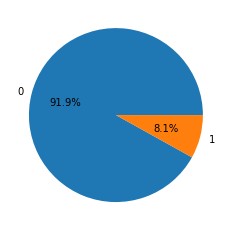

In [55]:
plt.pie(df_app['TARGET'].value_counts().values,labels= ['0','1'], autopct='%1.1f%%')
plt.show()

Yes, there is imbalance in the data as in the target variable there are high number of "0" than "1". The percentage of "0" category (i.e. the number of cases other than defaulters) is at 91.93% which is quite high than the defaulters. 

In [56]:
#Create separate datasets for defaulters and others
df_defaulters = df_app[df_app['TARGET'] == 1]
df_others = df_app[df_app['TARGET'] == 0]

In [57]:
set(df_app.columns) - set(newdf.columns)

{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'age_categorical',
 'income_categorical'}

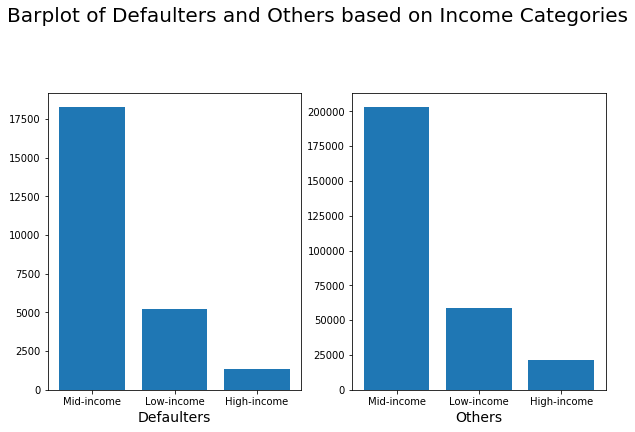

In [58]:
#Plot barplot for income_categorical for default customers and others.
fig = plt.figure(figsize=(10,12))
plt.suptitle("Barplot of Defaulters and Others based on Income Categories", fontsize=20)

ax1 = plt.subplot(2, 2, 1)
plt.bar(df_defaulters.income_categorical.unique(), df_defaulters.income_categorical.value_counts())
ax1.set_xlabel("Defaulters", fontsize=14)

ax2 = plt.subplot(2, 2, 2)
plt.bar(df_others.income_categorical.unique(), df_others.income_categorical.value_counts())
ax2.set_xlabel("Others", fontsize=14)
plt.show()

#### The above barplots for defaulters and other cases, depicts that there is almost similar kind of distribution when it comes to income categories. As the two graphs are identical. Although the in absolute numbers the others case is quite higher than the defaulters case but in percentage terms the number of people from each category is almost equal.

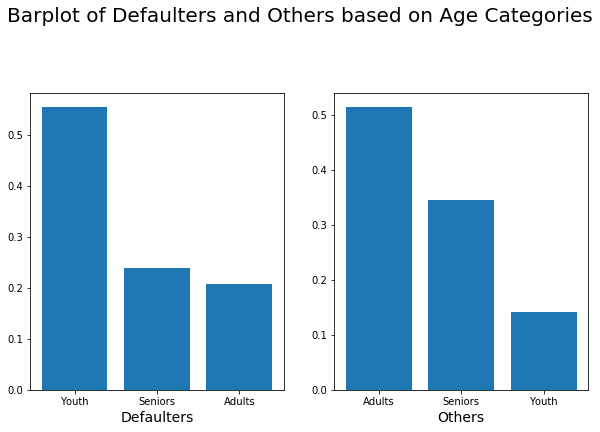

In [59]:
#Plot barplot for age_categorical for default customers and others.
fig = plt.figure(figsize=(10, 12))
plt.suptitle("Barplot of Defaulters and Others based on Age Categories", fontsize=20)

ax1 = plt.subplot(2, 2, 1)
plt.bar(df_defaulters.age_categorical.unique(), df_defaulters.age_categorical.value_counts(normalize=True))
ax1.set_xlabel("Defaulters", fontsize=14)

ax2 = plt.subplot(2, 2, 2)
plt.bar(df_others.age_categorical.unique(), df_others.age_categorical.value_counts(normalize=True))
ax2.set_xlabel("Others", fontsize=14)
plt.show()

#### In the first plot i.e the defaulters plot the percentage of youth (i.e. greater than 50%) is higher than seniors and that of seniors is higher than the adults. While in case of others the adults form the highest catetgory (greater than 50%) followed by seniors and then youth. From the above plot it can be safely inferred that the Adults age category is least likely to be defaulter. While the youth are most likely to be defaulters. 

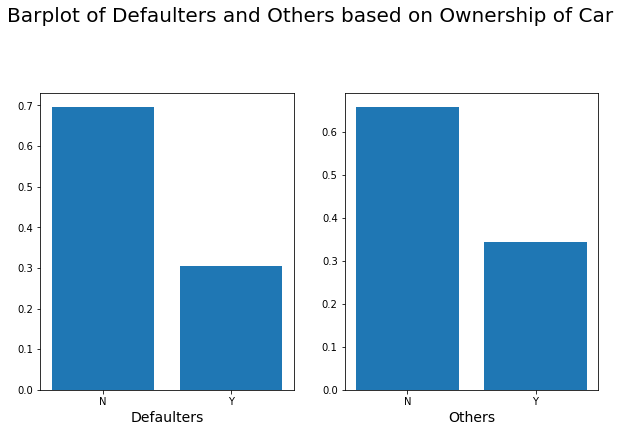

In [60]:
#Plot barplot for FLAG_OWN_CAR for default customers and others.
fig = plt.figure(figsize=(10, 12))
plt.suptitle("Barplot of Defaulters and Others based on Ownership of Car", fontsize=20)

ax1 = plt.subplot(2, 2, 1)
plt.bar(df_defaulters.FLAG_OWN_CAR.unique(), df_defaulters.FLAG_OWN_CAR.value_counts(normalize=True))
ax1.set_xlabel("Defaulters", fontsize=14)

ax2 = plt.subplot(2, 2, 2)
plt.bar(df_others.FLAG_OWN_CAR.unique(), df_others.FLAG_OWN_CAR.value_counts(normalize=True))
ax2.set_xlabel("Others", fontsize=14)
plt.show()

#### In all the cases be it defaulters or all the other cases the customers who own a car are less at near about 30%.

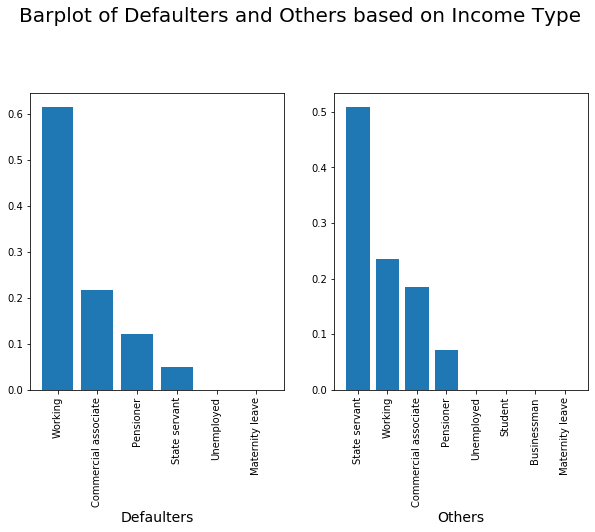

In [61]:
#Plot barplot for NAME_INCOME_TYPE for default customers and others.
fig = plt.figure(figsize=(10, 12))
plt.suptitle("Barplot of Defaulters and Others based on Income Type", fontsize=20)

ax1 = plt.subplot(2, 2, 1)
plt.bar(df_defaulters.NAME_INCOME_TYPE.unique(), df_defaulters.NAME_INCOME_TYPE.value_counts(normalize=True))
ax1.set_xlabel("Defaulters", fontsize=14)
plt.xticks(rotation=90)

ax2 = plt.subplot(2, 2, 2)
plt.bar(df_others.NAME_INCOME_TYPE.unique(), df_others.NAME_INCOME_TYPE.value_counts(normalize=True))
ax2.set_xlabel("Others", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [62]:
#### In case of defaulters the highest category is the working category while state servants category is on the lower end. On the contrary in case of all the other cases the state servants form the highest category.

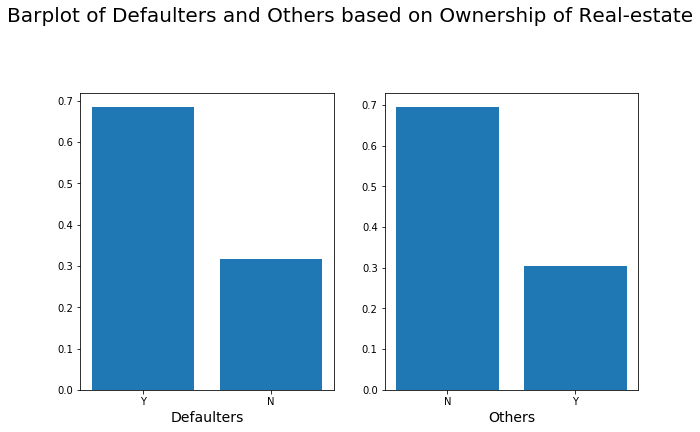

In [63]:
#Plot barplot for FLAG_OWN_REALTY for default customers and others.
fig = plt.figure(figsize=(10, 12))
plt.suptitle("Barplot of Defaulters and Others based on Ownership of Real-estate", fontsize=20)

ax1 = plt.subplot(2, 2, 1)
plt.bar(df_defaulters.FLAG_OWN_REALTY.unique(), df_defaulters.FLAG_OWN_REALTY.value_counts(normalize=True))
ax1.set_xlabel("Defaulters", fontsize=14)

ax2 = plt.subplot(2, 2, 2)
plt.bar(df_others.FLAG_OWN_REALTY.unique(), df_others.FLAG_OWN_REALTY.value_counts(normalize=True))
ax2.set_xlabel("Others", fontsize=14)
plt.show()

In the case of defaulters those who own real-estate are in greater percentage while in the case of all the other cases those who do not own real-estate are more. From this we can infer that those who own real-estate are more likely to default.

# Problem Statement 4
## Find the top 10 correlation for the Client with payment difficulties and all other cases.

In [64]:
#Correlation of variables of defaulters less than 1
corr_default = df_defaulters.corr()[df_defaulters.corr() < 1]

In [65]:
#values of top 10 correlations between variables of defaulters 
corr = 1
corr_top10_def = []
for i in range(0, 10): 
    corr = df_defaulters.corr()[df_defaulters.corr() < corr].max().max()
    corr_top10_def.append(corr)
print(corr_top10_def)

[0.9982686553105687, 0.9971868527569352, 0.9961235199927191, 0.9891951545681035, 0.9865941409029765, 0.983102519406511, 0.9804655487980579, 0.9780732303408631, 0.9566371636504873, 0.8854837134847298]


In [66]:
#Variable names of top 10 correlations of defaulters
top_10_def = []
for val in corr_top10_def:
    top_10_def.append(corr_default[corr_default.eq(val).any(0)].index)
top_10_def

[Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'], dtype='object'),
 Index(['FLOORSMAX_AVG', 'FLOORSMAX_MEDI'], dtype='object'),
 Index(['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI'], dtype='object'),
 Index(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI'], dtype='object'),
 Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE'], dtype='object'),
 Index(['AMT_CREDIT', 'AMT_GOODS_PRICE'], dtype='object'),
 Index(['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE'], dtype='object'),
 Index(['YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI'], dtype='object'),
 Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], dtype='object'),
 Index(['CNT_CHILDREN', 'CNT_FAM_MEMBERS'], dtype='object')]

In [67]:
#Correlation of variables of Others less than 1 
corr_others = df_others.corr()[df_others.corr() < 1]

In [69]:
#Values of top 10 correlations between variables of Others 
corr = 1
corr_top10_others = []
for i in range(0, 10): 
    corr = df_others.corr()[df_others.corr() < corr].max().max()
    corr_top10_others.append(corr)
print(corr_top10_others)

KeyboardInterrupt: 

In [ ]:
#Variable names of top 10 correlations of others
top_10_others = []
for val in corr_top10_others:
    top_10_others.append(corr_others[corr_others.eq(val).any(0)].index)
top_10_others

# Problem Statement 5
## Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

In [70]:
#Printing Categorical Columns
set(df_app.columns) - set(newdf.columns)

{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'age_categorical',
 'income_categorical'}

In [71]:
#Print numerical columns
newdf.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

### Univariate Analysis of Numeric Variables

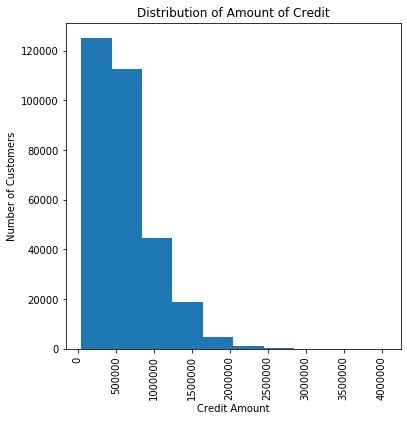

In [72]:
#plotting Histplot for the AMT_CREDIT variable 
plt.figure(figsize=(6,6))
plt.hist(df_app.AMT_CREDIT)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Amount of Credit")
plt.xlabel("Credit Amount")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### It can be clearly seen in the graph that the distribution is right skewed. The frequency of smaller values is quite higher than the higher values. 

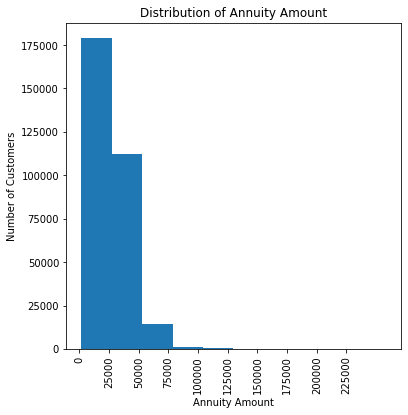

In [73]:
#plotting Histplot for the AMT_ANNUITY variable 
plt.figure(figsize=(6,6))
plt.hist(df_app.AMT_ANNUITY)
plt.title("Distribution of Annuity Amount")
plt.xlabel("Annuity Amount")
plt.ylabel("Number of Customers")
plt.xticks(range(0, 250000, 25000), rotation=90)
plt.show()

#### The highest range of Annuity amount paid by the customers is between 0 - 25000.

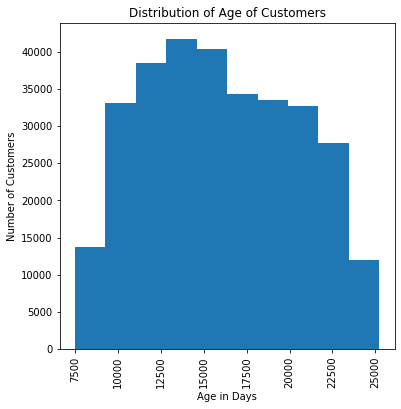

In [74]:
#plotting Histplot for the DAYS_BIRTH variable 
plt.figure(figsize=(6,6))
plt.hist(df_app.DAYS_BIRTH)
plt.title("Distribution of Age of Customers")
plt.xlabel("Age in Days")
plt.ylabel("Number of Customers")
plt.xticks( rotation=90)
plt.show()

#### Here the distribution is more towards the center which indicates that most of the customers are middle aged.

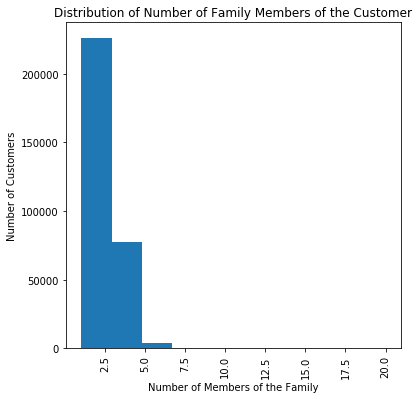

In [75]:
#plotting Histplot for the CNT_FAM_MEMBERS variable 
plt.figure(figsize=(6,6))
plt.hist(df_app.CNT_FAM_MEMBERS)
plt.title("Distribution of Number of Family Members of the Customer")
plt.xlabel("Number of Members of the Family")
plt.ylabel("Number of Customers")
plt.xticks( rotation=90)
plt.show()

#### The distribution is right skewed which indicates that most of the customers have the family size of less than 5.

In [76]:
corrected_days_employement = df_app[df_app['DAYS_EMPLOYED'] < 350000]['DAYS_EMPLOYED']

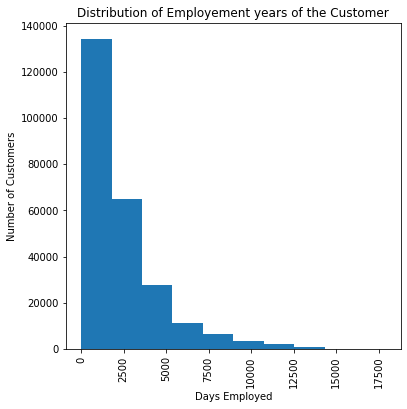

In [77]:
#plotting Histplot for the DAYS_EMPLOYED variable 
plt.figure(figsize=(6,6))
plt.hist(corrected_days_employement)
plt.xticks(rotation=90)
plt.title("Distribution of Employement years of the Customer")
plt.xlabel("Days Employed")
plt.ylabel("Number of Customers")
plt.show()

#### The distribution is right skewed which implies that most of the customers are employed for less than 5000 days.

### Univariate Analysis of Categorical Variables

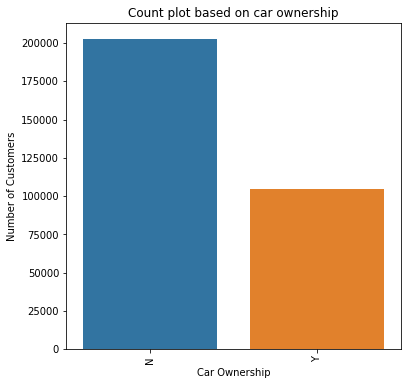

In [78]:
#plotting countplot for the FLAG_OWN_CAR variable 
plt.figure(figsize=(6,6))
sns.countplot(x='FLAG_OWN_CAR', data=df_app)
plt.xticks(rotation=90)
plt.title("Count plot based on car ownership")
plt.xlabel("Car Ownership")
plt.ylabel("Number of Customers")
plt.show()

#### More than 2/3rd of the customers who applied for loan do not own a car.

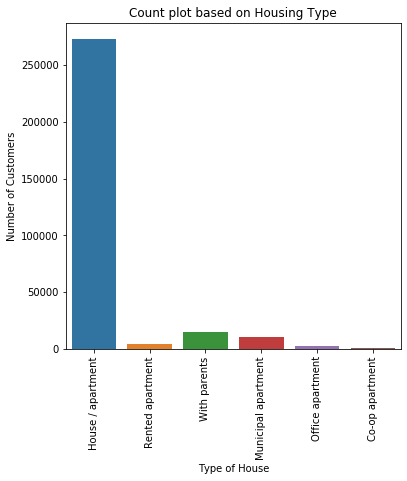

In [79]:
#plotting countplot for the NAME_HOUSING_TYPE variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_HOUSING_TYPE', data=df_app)
plt.xticks(rotation=90)
plt.title("Count plot based on Housing Type")
plt.xlabel("Type of House")
plt.ylabel("Number of Customers")
plt.show()

#### Most of the customers who applied for the loan lives in House / Appartment

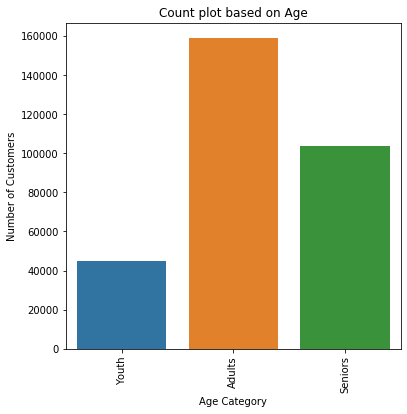

In [80]:
#plotting countplot for the age_categorical variable 
plt.figure(figsize=(6,6))
sns.countplot(x='age_categorical', data=df_app)
plt.xticks(rotation=90)
plt.title("Count plot based on Age")
plt.xlabel("Age Category")
plt.ylabel("Number of Customers")
plt.show()

#### Most of the customers who applied for the loan are adults followed by seniors and then youth.

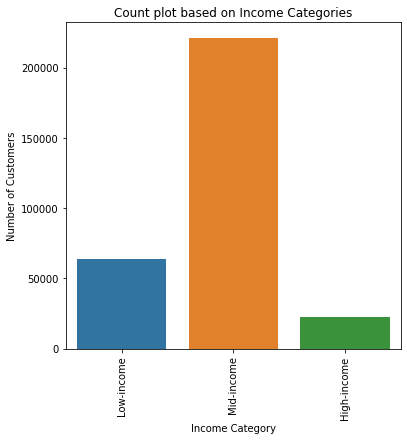

In [81]:
#plotting countplot for the income_categorical variable 
plt.figure(figsize=(6,6))
sns.countplot(x='income_categorical', data=df_app)
plt.xticks(rotation=90)
plt.title("Count plot based on Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Number of Customers")
plt.show()

#### Most of the customers who has the average income applies for the loan followed by the low income customers and then higher income customers.

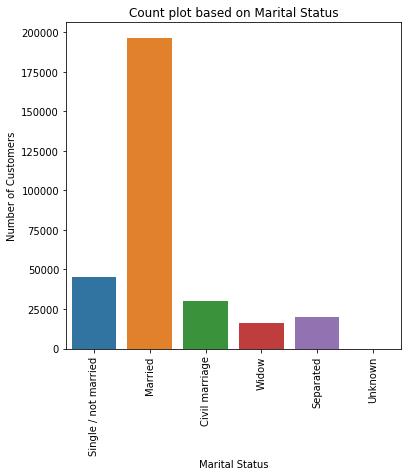

In [82]:
#plotting countplot for the NAME_FAMILY_STATUS variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_FAMILY_STATUS', data=df_app)
plt.xticks(rotation=90)
plt.title("Count plot based on Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()

#### Customers who are married are most likely to apply for the loan followed by single or not married customers.

### Bivariate analysis of Numerical Variables

In [83]:
# create a new dataframe of income without outliers
income_no_outliers = df_app[df_app['AMT_INCOME_TOTAL'] < 337500.0]

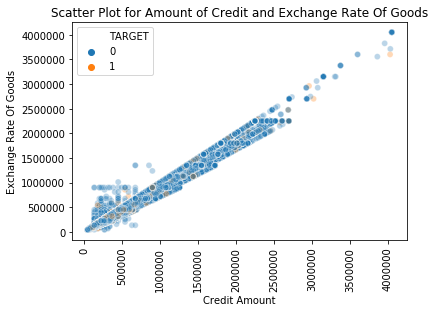

In [84]:
#plotting scatter plot for AMT_GOODS_PRICE and AMT_CREDIT

a = sns.scatterplot(df_app.AMT_CREDIT, df_app.AMT_GOODS_PRICE, hue=df_app.TARGET, alpha=0.3)

plt.title("Scatter Plot for Amount of Credit and Exchange Rate Of Goods")
plt.xlabel('Credit Amount', fontsize=10)
plt.ylabel('Exchange Rate Of Goods', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### In the initial stage, there is no clear relationship between the two variables. However eventually as the amount of credit increases the exchange rate of goods also increases in a linear fashion. From which we can infer that the amount of credit increases with the increase in amount of goods price and vice versa.

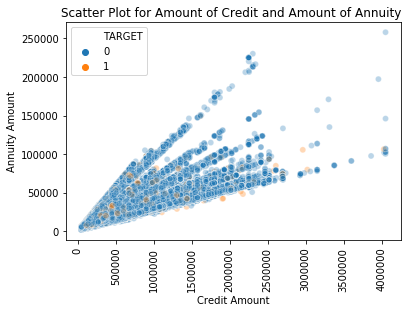

In [85]:
#plotting scatter plot for AMT_CREDIT and AMT_ANNUITY  

a = sns.scatterplot(df_app.AMT_CREDIT, df_app.AMT_ANNUITY, hue=df_app.TARGET, alpha=0.3)

plt.title("Scatter Plot for Amount of Credit and Amount of Annuity ")
plt.xlabel('Credit Amount', fontsize=10)
plt.ylabel('Annuity Amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Here it can be seen that the graph eventually splits into a number of linear looking functions. From which it can be infered that the bank is offering differential rate of interest to its customers. As the same amount of credit have different amount of annuity. This is usually based on a number of elements such as the amount of risk involved, the credit score of the customer etc. Based on such factors the bank is ready to provide loans to different customers at diiferent rate of interests. 

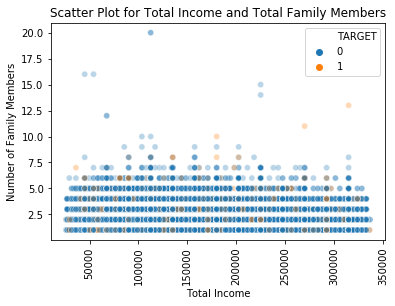

In [86]:
#plotting scatter plot for AMT_INCOME_TOTAL and CNT_FAM_MEMBERS  

a = sns.scatterplot(income_no_outliers['AMT_INCOME_TOTAL'],income_no_outliers['CNT_FAM_MEMBERS'], hue=df_app.TARGET, alpha=0.3)

plt.title("Scatter Plot for Total Income and Total Family Members")
plt.xlabel('Total Income', fontsize=10)
plt.ylabel('Number of Family Members', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### There cannot be seen any specific relation between the two variables. As there is no pattern, the association is zero. 

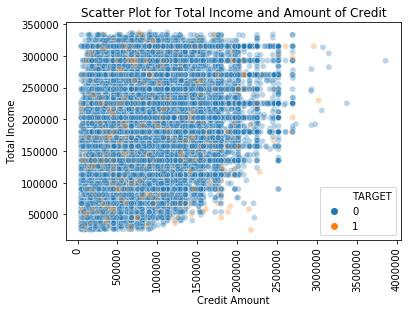

In [87]:
#plotting scatter plot for AMT_INCOME_TOTAL and AMT_CREDIT

a = sns.scatterplot(income_no_outliers['AMT_CREDIT'],income_no_outliers['AMT_INCOME_TOTAL'], hue=df_app.TARGET, alpha=0.3)

plt.title("Scatter Plot for Total Income and Amount of Credit")
plt.xlabel('Credit Amount', fontsize=10)
plt.ylabel('Total Income', fontsize=10)
plt.xticks(rotation=90)
plt.show()

####  For all the income groups customers have applied for varied amount of loans but to a certain limit (i.e. 2500000). Beyond this point a very few high Income customers have applied for a loan. 

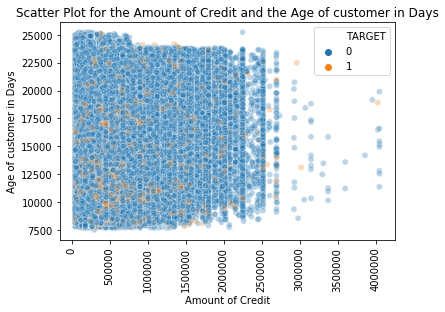

In [88]:
#plotting scatter plot for AMT_CREDIT and DAYS_BIRTH  

a = sns.scatterplot(df_app.AMT_CREDIT, df_app.DAYS_BIRTH, hue=df_app.TARGET, alpha=0.3)

plt.title("Scatter Plot for the Amount of Credit and the Age of customer in Days")
plt.xlabel('Amount of Credit', fontsize=10)
plt.ylabel('Age of customer in Days', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Similar to the above scatterplot in can be noticed that upto a certain point all the age groups have applied for varied amount of loans. Beyond which only a few lower and mid age groups have applied for loans that are of higher amount. 

### Bivariate analysis of Categorical-Numerical Variables


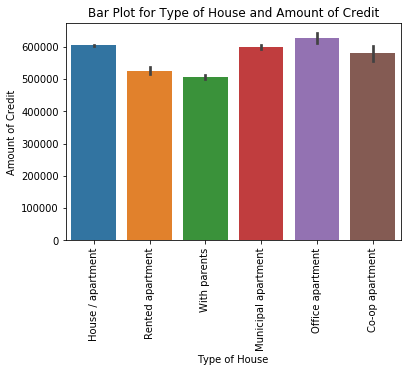

In [89]:
#Plotting barplot for NAME_HOUSING_TYPE and AMT_CREDIT
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', data=df_app)
plt.title("Bar Plot for Type of House and Amount of Credit")
plt.xlabel("Type of House")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

#### All the customers irrespective of type of the houses they live in have an minimum mean credit amount of 500000. Highest among them all is for the customers residing in Office Aartments with a mean credit amount of approximately 650000.

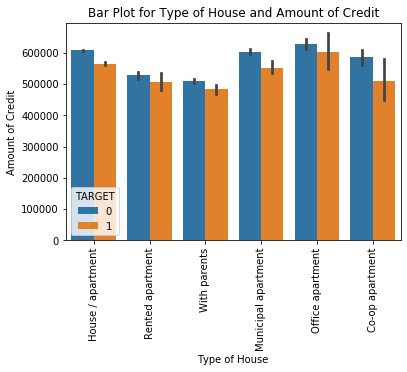

In [90]:
#Plotting barplot for NAME_HOUSING_TYPE and AMT_CREDIT
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', data=df_app, hue="TARGET")
plt.title("Bar Plot for Type of House and Amount of Credit")
plt.xlabel("Type of House")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

#### For each of the given category all the deafulters have lower amount of credit. Further the office apartments have the highest mean amongst all the categories for both the target variables respectively. 

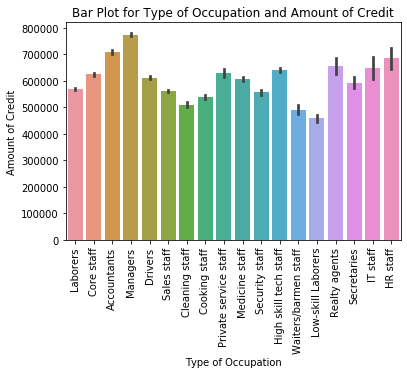

In [91]:
#Plotting barplot for OCCUPATION_TYPE and AMT_CREDIT
sns.barplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', data=df_app)
plt.title("Bar Plot for Type of Occupation and Amount of Credit")
plt.xlabel("Type of Occupation")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

#### **Managers** get the **highest credit amount** whereas **Low-skill Labours** get the **lowest amount of credit**. Most of the customers gets credit amount of more than 500000 except for Cleaning Staff, Waiters/Barmen Staff and Low-skill staff.

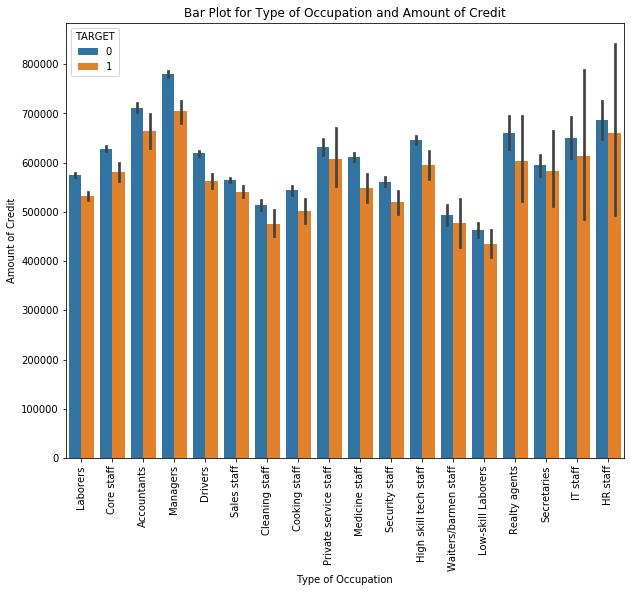

In [92]:
#Plotting barplot for OCCUPATION_TYPE and AMT_CREDIT
plt.figure(figsize=(10, 8))
sns.barplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', data=df_app, hue="TARGET")
plt.title("Bar Plot for Type of Occupation and Amount of Credit")
plt.xlabel("Type of Occupation")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

For both the target variables the Managers get the highest credit amount whereas Low-skill Labourers get the lowest amount of credit.It is interesting to note that the amount of credit has a relation with the occupation type. As the posts in the heirarchichal chain increase the amount of credit also increases. Further the deafualters have a lower mean of amount of credit for all the categories.


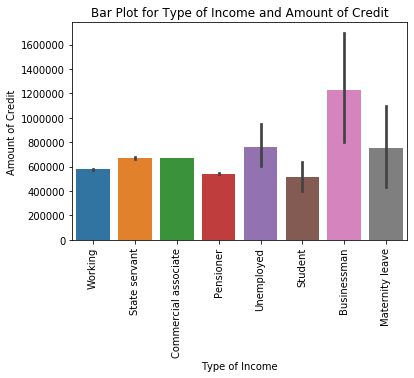

In [93]:
#Plotting barplot for NAME_INCOME_TYPE and AMT_CREDIT
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df_app)
plt.title("Bar Plot for Type of Income and Amount of Credit")
plt.xlabel("Type of Income")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

#### Customers who are **Businessman** get the **highest credit amount** followed by unemployed and customers who applied for Maternity leave  whereas **students** gets the **lowest credit amount**.

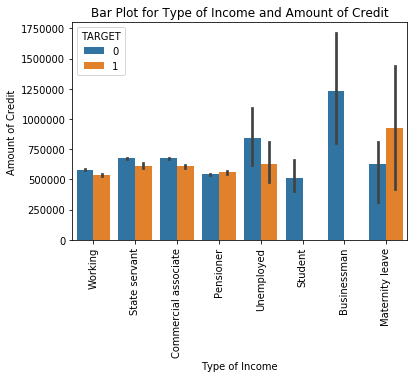

In [94]:
#Plotting barplot for NAME_INCOME_TYPE and AMT_CREDIT
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df_app, hue="TARGET")
plt.title("Bar Plot for Type of Income and Amount of Credit")
plt.xlabel("Type of Income")
plt.ylabel("Amount of Credit")
plt.xticks(rotation=90)
plt.show()

#### It is very interesting to note that the Businessmen and Students have no defaulters. Whereas in the other cases, the bussinessmen have received largest mean amount of credit. While in case of those who are on maternity leave the defaulters have the largest mean amount of credit.

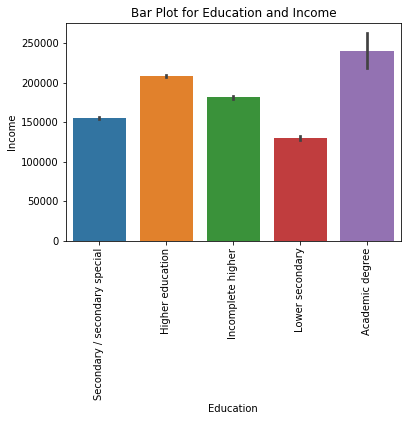

In [95]:
#Plotting barplot for NAME_EDUCATION_TYPE and AMT_INCOME_TOTAL
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=df_app)
plt.title("Bar Plot for Education and Income")
plt.xlabel("Education")
plt.ylabel("Income")
plt.xticks(rotation=90)
plt.show()

#### The customers who have earned an **Academic Degree** have the **highest income** followed by **Higher Education** whereas the customers who have persued **Lower Secondary** education have the **lowest income**.

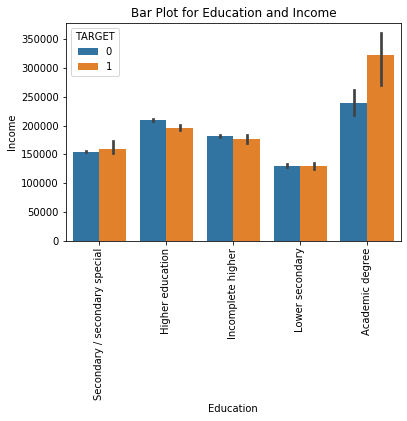

In [96]:
#Plotting barplot for NAME_EDUCATION_TYPE and AMT_INCOME_TOTAL
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=df_app, hue="TARGET")
plt.title("Bar Plot for Education and Income")
plt.xlabel("Education")
plt.ylabel("Income")
plt.xticks(rotation=90)
plt.show()

The customers who have earned an Academic Degree have the largest mean income and amongst those who have the higher mean income are the ones who have defaulted. 

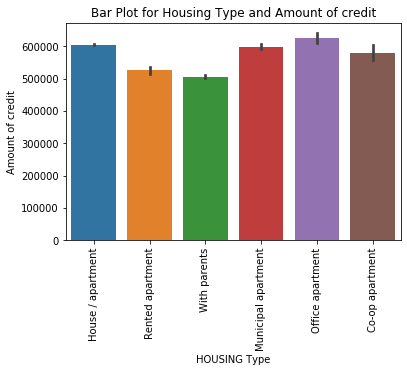

In [97]:
#Plotting barplot for NAME_HOUSING_TYPE and AMT_CREDIT
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', data=df_app)
plt.title("Bar Plot for Housing Type and Amount of credit")
plt.xlabel("HOUSING Type")
plt.ylabel("Amount of credit")
plt.xticks(rotation=90)
plt.show()

#### The customers who own an office apartment get the highest amount of credit while those living with their parents get the lowest amount of credit.  

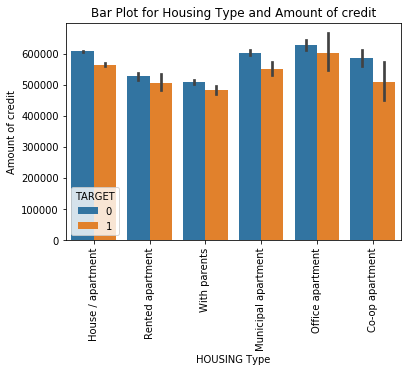

In [98]:
#Plotting barplot for NAME_HOUSING_TYPE and AMT_CREDIT
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', data=df_app, hue="TARGET")
plt.title("Bar Plot for Housing Type and Amount of credit")
plt.xlabel("HOUSING Type")
plt.ylabel("Amount of credit")
plt.xticks(rotation=90)
plt.show()

The mean amount of credit in the case of Office Apartment is the largest in both the target cases. While those living with parents have the lowest. 

### Bivariate analysis of Categorical Variables

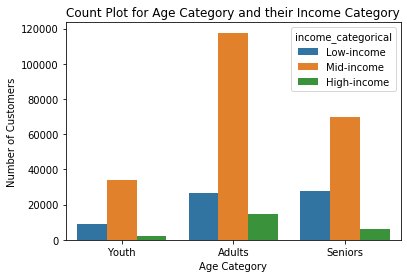

In [99]:
#Plotting countplot for age_categorical and income_categorical
sns.countplot(x='age_categorical', hue='income_categorical', data=df_app)
plt.title("Count Plot for Age Category and their Income Category")
plt.xlabel("Age Category")
plt.ylabel("Number of Customers")
plt.show()

#### Here in this plot it can be clearly seen that amongst all the three age categories the mid-income group is the largest. Which is followed by low-income and then high income. It is interesting to note that the high-income group is significantly greater in the adults age category than the other two. 


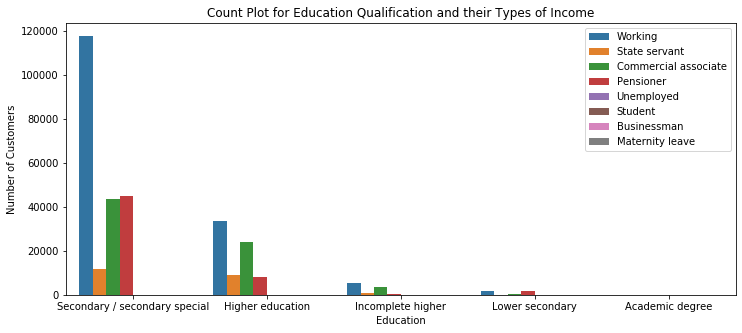

In [100]:
#Plotting countplot for NAME_EDUCATION_TYPE and NAME_INCOME_TYPE
plt.figure(figsize=(12,5))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_INCOME_TYPE', data=df_app)
plt.title("Count Plot for Education Qualification and their Types of Income")
plt.xlabel("Education")
plt.ylabel("Number of Customers")
plt.legend(loc='upper right')
plt.show()

#### Most of the customers who are working professionals have persued seconadary/secondary special education followed by higher education. The least number of customers are from Academic degree background.

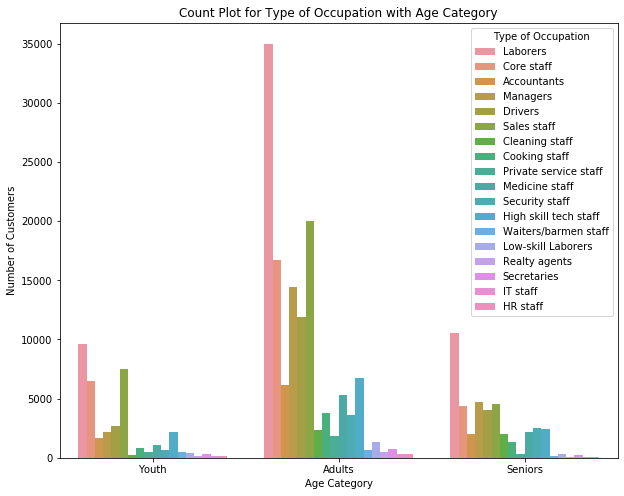

In [101]:
#Plotting countplot for OCCUPATION_TYPE and age_categorical
plt.figure(figsize=(10,8))
sns.countplot(x='age_categorical', hue='OCCUPATION_TYPE', data=df_app)
plt.title("Count Plot for Type of Occupation with Age Category")
plt.xlabel("Age Category")
plt.ylabel("Number of Customers")
plt.legend(title="Type of Occupation", loc='upper right')
plt.show()

#### Most of the customers in all the age groups work as laborers while in the case of adults it is significantly higher. Followed by Core staff, Accountants, Managers etc. While occupation types such as Secretaries, IT staff and HR staff are the least employed areas. 

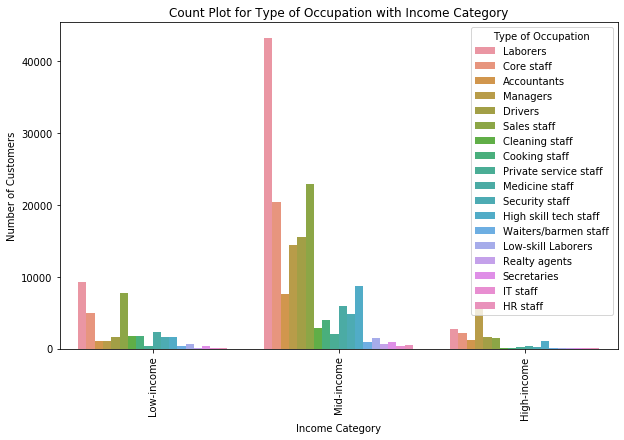

In [102]:
#Plotting countplot for OCCUPATION_TYPE and income_categorical
plt.figure(figsize=(10,6))
sns.countplot(x='income_categorical', hue='OCCUPATION_TYPE', data=df_app)
plt.title("Count Plot for Type of Occupation with Income Category")
plt.xlabel("Income Category")
plt.ylabel("Number of Customers")
plt.legend(title="Type of Occupation", loc='upper right')
plt.xticks(rotation=90)
plt.show()

#### Major number of customers earn an average income. Customers who earn average income mostly are laborers followed by sales staff, core staff, drivers and managers. Customers who have high income are more in number in the managers category.  

# previous_application 

In [103]:
#Loading previous application dataset
df_previous = pd.read_csv("D:\\upGrad\\DS\Assignments\\Assignment-2\\previous_application.csv")

In [104]:
#Print head of the data
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,...,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,...,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,...,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,...,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,...,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [105]:
#Print shape of the data
df_previous.shape

(1670214, 37)

In [106]:
#Print info of the data 
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [107]:
# print descriptive statistics of the application dataset
df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00000,1670214.00000,1297979.00000,1670214.00000,1670213.00000,774370.00000,1284699.00000,1670214.00000,1670214.00000,774370.00000,...,5951.00000,1670214.00000,1670214.00000,1297984.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,1923089.13533,278357.17410,15955.12066,175233.86036,196114.02122,6697.40214,227847.27928,12.48418,0.99647,0.07964,...,0.77350,-880.67967,313.95112,16.05408,342209.85504,13826.26934,33767.77405,76582.40306,81992.34384,0.33257
std,532597.95870,102814.82385,14782.13733,292779.76239,318574.61655,20921.49541,315396.55794,3.33403,0.05933,0.10782,...,0.10088,779.09967,7127.44346,14.56729,88916.11583,72444.86971,106857.03479,149647.41512,153303.51673,0.47113
min,1000001.00000,100001.00000,0.00000,0.00000,0.00000,-0.90000,0.00000,0.00000,0.00000,-0.00001,...,0.37315,-2922.00000,-1.00000,0.00000,-2922.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000,0.00000
25%,1461857.25000,189329.00000,6321.78000,18720.00000,24160.50000,0.00000,50841.00000,10.00000,1.00000,0.00000,...,0.71564,-1300.00000,-1.00000,6.00000,365243.00000,-1628.00000,-1242.00000,-1314.00000,-1270.00000,0.00000
50%,1923110.50000,278714.50000,11250.00000,71046.00000,80541.00000,1638.00000,112320.00000,12.00000,1.00000,0.05161,...,0.83510,-581.00000,3.00000,12.00000,365243.00000,-831.00000,-361.00000,-537.00000,-499.00000,0.00000
75%,2384279.75000,367514.00000,20658.42000,180360.00000,216418.50000,7740.00000,234000.00000,15.00000,1.00000,0.10891,...,0.85254,-280.00000,82.00000,24.00000,365243.00000,-411.00000,129.00000,-74.00000,-44.00000,1.00000
max,2845382.00000,456255.00000,418058.14500,6905160.00000,6905160.00000,3060045.00000,6905160.00000,23.00000,1.00000,1.00000,...,1.00000,-1.00000,4000000.00000,84.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,1.00000


# Problem Statement 5
## Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

In [108]:
#Print numerical columns
newdf_prev = df_previous.select_dtypes(include=['float64', 'int64'])
newdf_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [109]:
#Print categorical columns
set(df_previous.columns) - set(newdf_prev.columns)

{'CHANNEL_TYPE',
 'CODE_REJECT_REASON',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_TYPE_SUITE',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'WEEKDAY_APPR_PROCESS_START'}

### Univariate Analysis of Numerical Variables

In [110]:
Range_AMT_CREDIT = df_previous[df_previous['AMT_CREDIT'] < 2500000]['AMT_CREDIT']

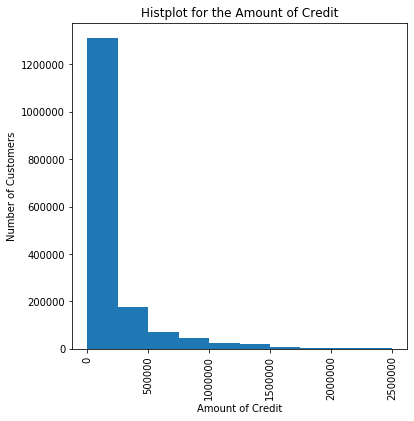

In [111]:
#plotting Histplot for the AMT_CREDIT variable 
plt.figure(figsize=(6,6))
plt.hist(Range_AMT_CREDIT)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Histplot for the Amount of Credit")
plt.xlabel("Amount of Credit")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the customers gets the credit amount in the range of 0 to 500000.

In [112]:
Range_AMT_ANNUITY = df_previous[df_previous['AMT_ANNUITY'] < 100000]['AMT_ANNUITY']

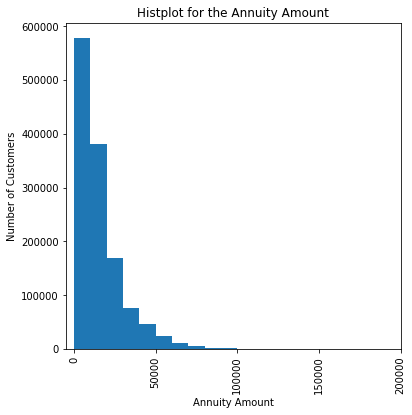

In [113]:
#plotting Histplot for the AMT_ANNUITY variable 
plt.figure(figsize=(6,6))
plt.hist(Range_AMT_ANNUITY)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Histplot for the Annuity Amount")
plt.xlabel("Annuity Amount")
plt.ylabel("Number of Customers")
plt.xticks(range(0, 250000, 50000), rotation=90)
plt.show()

#### Most of the customers pay the Annuity amount upto 500000.

In [114]:
Range_AMT_GOODS_PRICE = df_previous[df_previous['AMT_GOODS_PRICE'] < 3000000]['AMT_GOODS_PRICE']

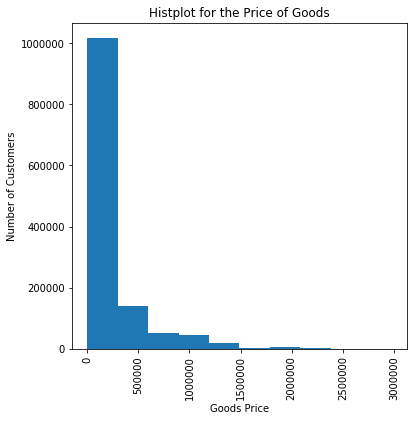

In [115]:
#plotting Histplot for the AMT_GOODS_PRICE variable 
plt.figure(figsize=(6,6))
plt.hist(Range_AMT_GOODS_PRICE)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Histplot for the Price of Goods")
plt.xlabel("Goods Price")
plt.ylabel("Number of Customers")
plt.xticks( rotation=90)
plt.show()

#### The bank has the price range of goods upto 230000 approximately. Most of the custromers ask for the price of goods in the range of 1000000.

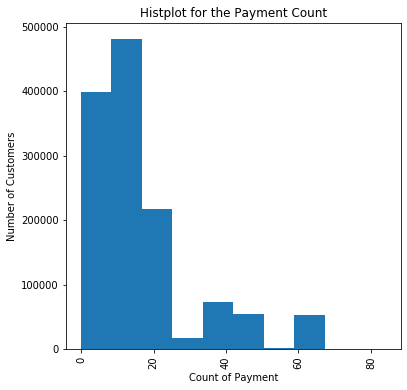

In [116]:
#plotting Histplot for the CNT_PAYMENT variable 
plt.figure(figsize=(6,6))
plt.hist(df_previous.CNT_PAYMENT)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Histplot for the Payment Count")
plt.xlabel("Count of Payment")
plt.ylabel("Number of Customers")
plt.xticks( rotation=90)
plt.show()

#### The term of loan for the previous applications has been generally below 20.

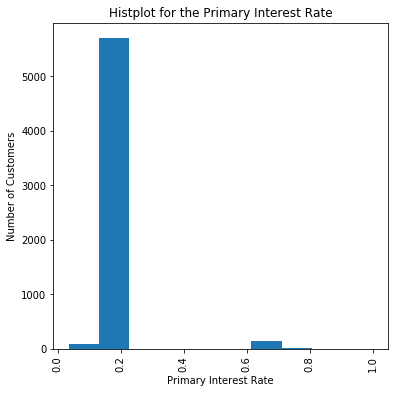

In [117]:
#plotting Histplot for the RATE_INTEREST_PRIMARY variable 
plt.figure(figsize=(6,6))
plt.hist(df_previous.RATE_INTEREST_PRIMARY)
plt.title("Histplot for the Primary Interest Rate")
plt.xlabel("Primary Interest Rate")
plt.ylabel("Number of Customers")
plt.xticks( rotation=90)
plt.show()

#### The most common primary interest rate is between 0.1 and 0.2  

### Univariate analysis of Categorical Variables

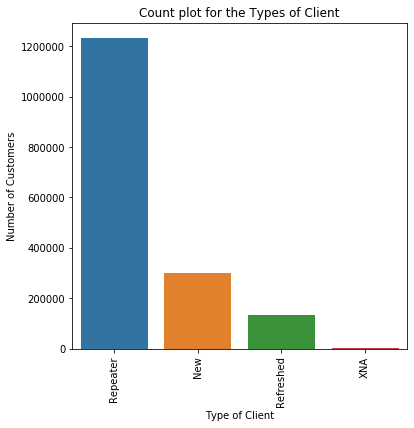

In [118]:
#plotting countplot for the NAME_CLIENT_TYPE variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_CLIENT_TYPE', data=df_previous)
plt.title("Count plot for the Types of Client")
plt.xlabel("Type of Client")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the clients of the bank are Repeated Customers followed by New and Refreshed Clients.

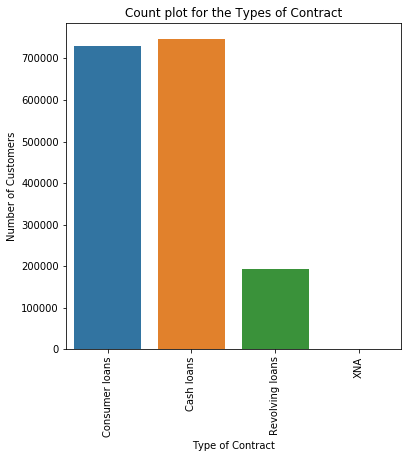

In [119]:
#plotting countplot for the NAME_CONTRACT_TYPE variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_previous)
plt.title("Count plot for the Types of Contract")
plt.xlabel("Type of Contract")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Customers are more likely to opt for Cash loans as well as Consumer loans, Revolving loans are least required.

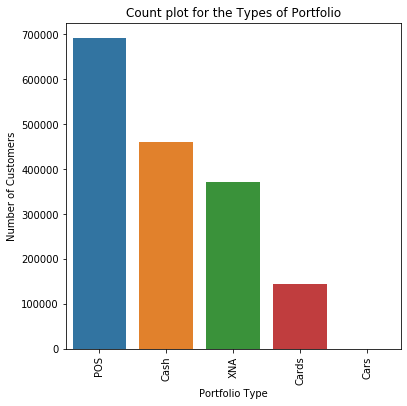

In [120]:
#plotting countplot for the NAME_PORTFOLIO variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_PORTFOLIO', data=df_previous)
plt.title("Count plot for the Types of Portfolio")
plt.xlabel("Portfolio Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the applications were for POS previously followed by Cash and then cards.

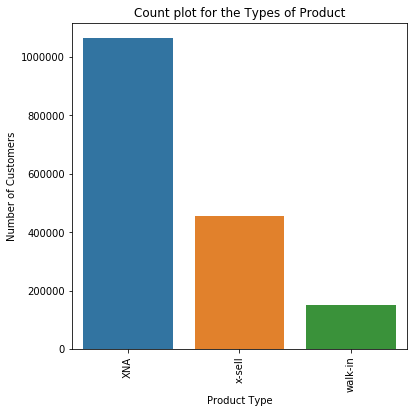

In [121]:
#plotting countplot for the NAME_PRODUCT_TYPE variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_PRODUCT_TYPE', data=df_previous)
plt.title("Count plot for the Types of Product")
plt.xlabel("Product Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Product type for most of the customers is unknown so here we cannot infer anything to predict the analysis.

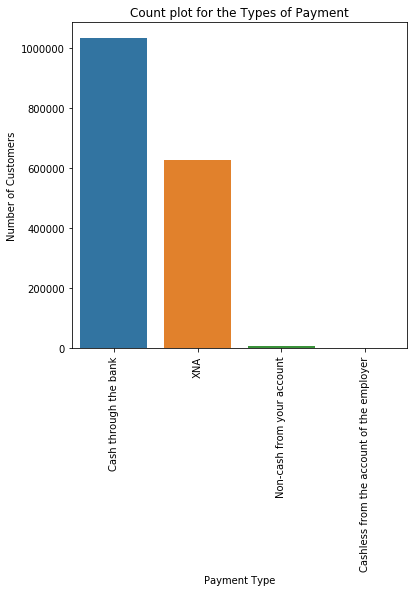

In [122]:
#plotting countplot for the NAME_PAYMENT_TYPE variable 
plt.figure(figsize=(6,6))
sns.countplot(x='NAME_PAYMENT_TYPE', data=df_previous)
plt.title("Count plot for the Types of Payment")
plt.xlabel("Payment Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Payment method used by majority of the customers is by paying cash through the bank.

### Bivariate analysis of Numerical Variables

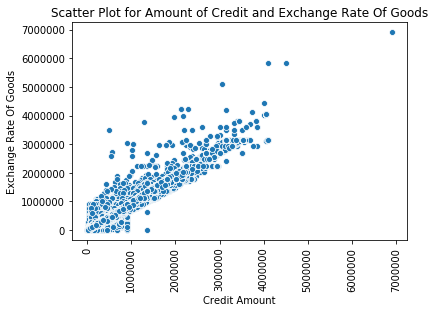

In [123]:
#plotting scatter plot for AMT_GOODS_PRICE and AMT_CREDIT

a = sns.scatterplot(df_previous.AMT_CREDIT, df_previous.AMT_GOODS_PRICE)

plt.title("Scatter Plot for Amount of Credit and Exchange Rate Of Goods")
plt.xlabel('Credit Amount', fontsize=10)
plt.ylabel('Exchange Rate Of Goods', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### The amount of credit increases as the exchange rate of goods increases. Which gives us an inference that as the amount of goods offered by the customer increases the bank is also willing to give more amount of credit. 

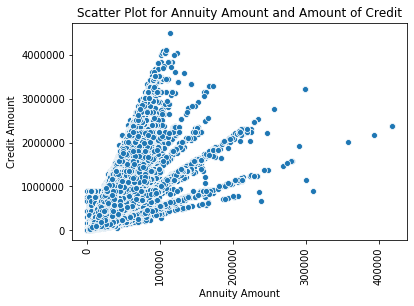

In [124]:
#plotting scatter plot for AMT_ANNUITY and AMT_CREDIT

a = sns.scatterplot(df_previous.AMT_ANNUITY, df_previous.AMT_CREDIT)

plt.title("Scatter Plot for Annuity Amount and Amount of Credit")
plt.xlabel('Annuity Amount', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Here, we can see that the graph splits into a multiple number of linear functions. This can happen when the bank is offering different loans at different rate of interest. Which is leading to different amounts of annuity for the same amount of loan. Banks generally do that based on the profile of the customer. The same pattern was noticed in the application dataset as well. 

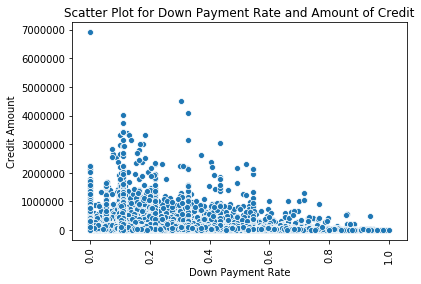

In [125]:
#plotting scatter plot for RATE_DOWN_PAYMENT and AMT_CREDIT

a = sns.scatterplot(df_previous.RATE_DOWN_PAYMENT, df_previous.AMT_CREDIT)

plt.title("Scatter Plot for Down Payment Rate and Amount of Credit")
plt.xlabel('Down Payment Rate', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### From the graph it can be inferred that at smaller amounts of credit the rate of down payment is more diverse. Eventually for the higher amounts the rate of down payment is usually in between 0 and 6 percent of credit.

In [126]:
df_previous.DAYS_DECISION = abs(df_previous.DAYS_DECISION)
df_previous.DAYS_DECISION

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

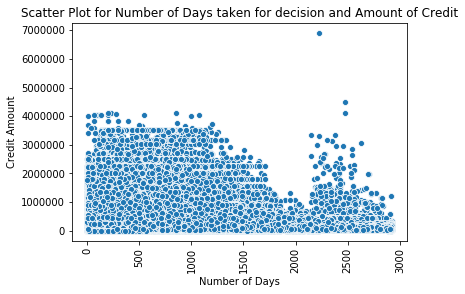

In [127]:
#plotting scatter plot for DAYS_DECISION and AMT_CREDIT

a = sns.scatterplot(df_previous.DAYS_DECISION, df_previous.AMT_CREDIT)

plt.title("Scatter Plot for Number of Days taken for decision and Amount of Credit")
plt.xlabel('Number of Days', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### For the higher amounts lesser number of days are taken. Eventually as the number of days increase the amount of credit decreases.

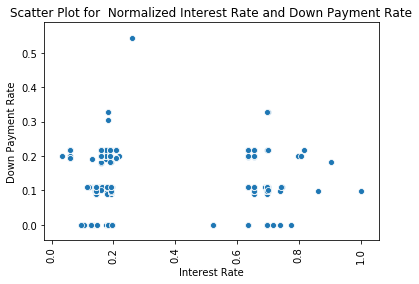

In [128]:
#plotting scatter plot for RATE_INTEREST_PRIMARY and RATE_DOWN_PAYMENT

a = sns.scatterplot(df_previous.RATE_INTEREST_PRIMARY, df_previous.RATE_DOWN_PAYMENT)

plt.title("Scatter Plot for  Normalized Interest Rate and Down Payment Rate")
plt.xlabel('Interest Rate', fontsize=10)
plt.ylabel('Down Payment Rate', fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### It can clearly be seen that between the interest rates 0.2 and 0.4  there comparatively lesser number of credits. While for those below and above, the rate of down payment has been quite diverse but generally below 0.3.

### Bivariate analysis of Categorical-Numerical Variables

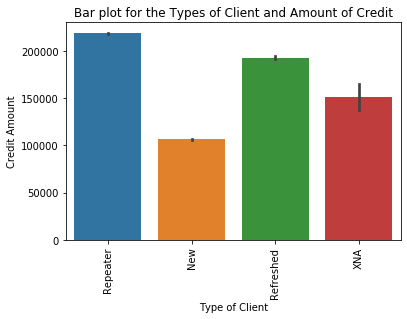

In [129]:
#Plotting barplot for NAME_CLIENT_TYPE and AMT_CREDIT
sns.barplot(x='NAME_CLIENT_TYPE', y='AMT_CREDIT', data=df_previous)
plt.title("Bar plot for the Types of Client and Amount of Credit")
plt.xlabel("Type of Client")
plt.ylabel("Credit Amount")
plt.xticks(rotation=90)
plt.show()

#### Credit Amount for the repeated and refreshed customers are more in comparision to the new customers.

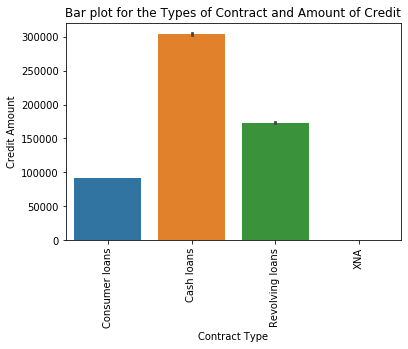

In [130]:
#Plotting barplot for NAME_CONTRACT_TYPE and AMT_CREDIT
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=df_previous)
plt.title("Bar plot for the Types of Contract and Amount of Credit")
plt.xlabel("Contract Type")
plt.ylabel("Credit Amount")
plt.xticks(rotation=90)
plt.show()

####  Cash loans get more credit amount than any other contract types of loan.

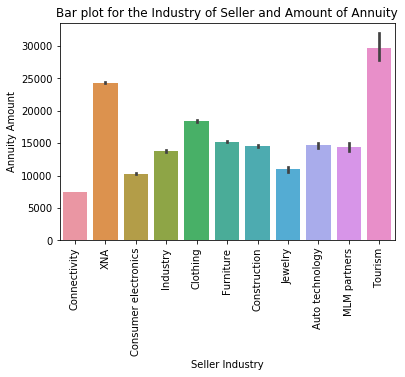

In [131]:
#Plotting barplot for NAME_SELLER_INDUSTRY and AMT_ANNUITY
sns.barplot(x='NAME_SELLER_INDUSTRY', y='AMT_ANNUITY', data=df_previous)
plt.title("Bar plot for the Industry of Seller and Amount of Annuity")
plt.xlabel("Seller Industry")
plt.ylabel("Annuity Amount")
plt.xticks(rotation=90)
plt.show()

#### Loans taken by tourism industry has to pay comparitively high annuity amount than all the other industries mentioned. Connectivity Industry had to pay the least amount of annuity.

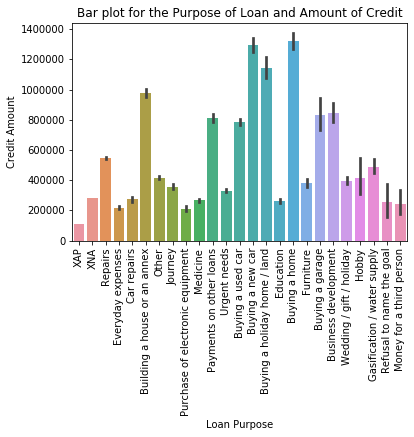

In [132]:
#Plotting barplot for NAME_CASH_LOAN_PURPOSE and AMT_CREDIT
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT', data=df_previous)
plt.title("Bar plot for the Purpose of Loan and Amount of Credit")
plt.xlabel("Loan Purpose")
plt.ylabel("Credit Amount")
plt.xticks(rotation=90)
plt.show()

#### Loan for buying a home as well as a new car or buying a holiday home purposes have higher credit amount than any other loan purposes. Most of credit amount for any loan purpose is less than 600000.

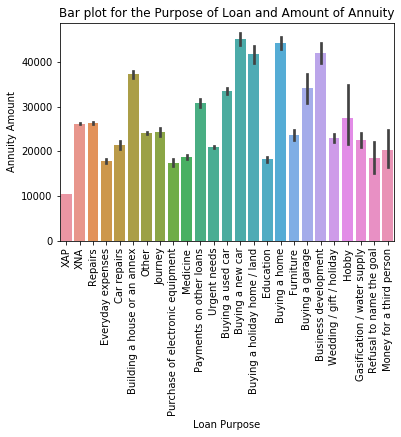

In [133]:
#Plotting barplot for NAME_CASH_LOAN_PURPOSE and AMT_ANNUITY
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_ANNUITY', data=df_previous)
plt.title("Bar plot for the Purpose of Loan and Amount of Annuity")
plt.xlabel("Loan Purpose")
plt.ylabel("Annuity Amount")
plt.xticks(rotation=90)
plt.show()

#### Customers who applied loan to  buy a new car, buy a hoiday home/and, buy a home, loan for business development, buying a garage and bulding a house or an annex has to pay the annuity amount greater than 30000. 

### Bivariate analysis of Categorical Variables

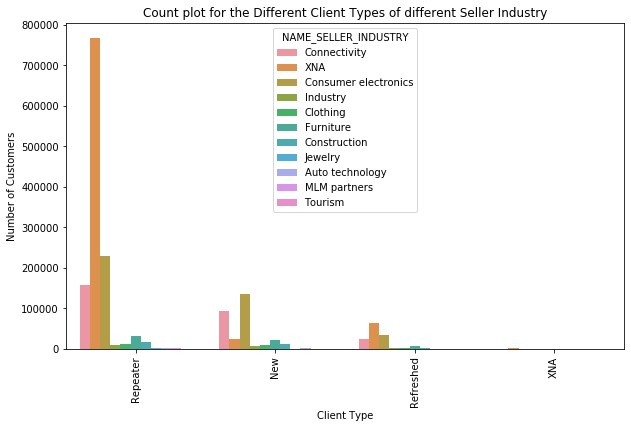

In [134]:
#Plotting countplot for NAME_CLIENT_TYPE and NAME_SELLER_INDUSTRY
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_SELLER_INDUSTRY', data=df_previous)
plt.title("Count plot for the Different Client Types of different Seller Industry")
plt.xlabel("Client Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the customers who applied loan are the repeated customers from various industries. Consumer Electronics industry customers are the customers who applied for the loan majorly. Connectivty and industry sellers are the ones who usually apply for loan atmost.

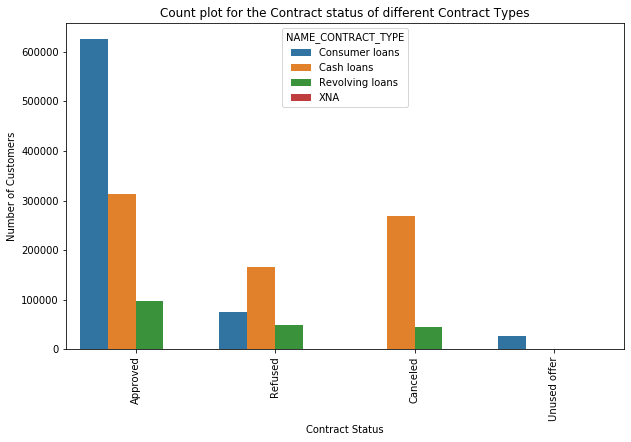

In [135]:
#Plotting countplot for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_CONTRACT_TYPE', data=df_previous)
plt.title("Count plot for the Contract status of different Contract Types")
plt.xlabel("Contract Status")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the loans that were approved are Consumer loan type.

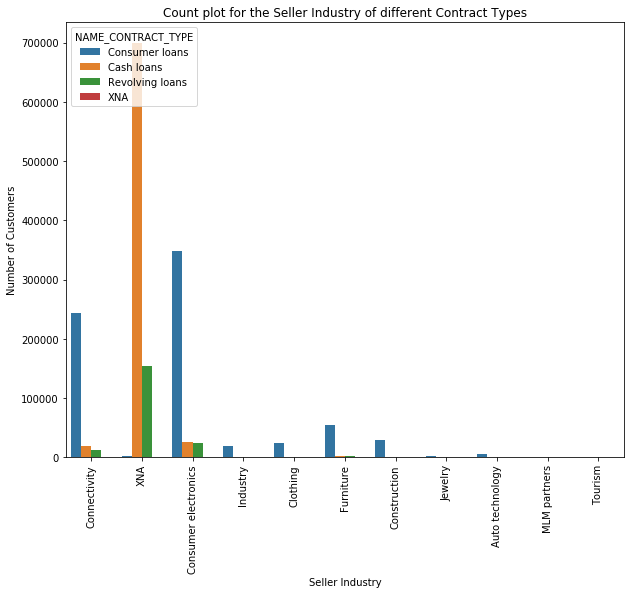

In [136]:
#Plotting countplot for NAME_SELLER_INDUSTRY and NAME_CONTRACT_TYPE
plt.figure(figsize=(10,8))
sns.countplot(x='NAME_SELLER_INDUSTRY', hue='NAME_CONTRACT_TYPE', data=df_previous)
plt.title("Count plot for the Seller Industry of different Contract Types")
plt.xlabel("Seller Industry")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the data for the Seller Industry for different contract types is not available so it is difficult to infer any insights from the given data

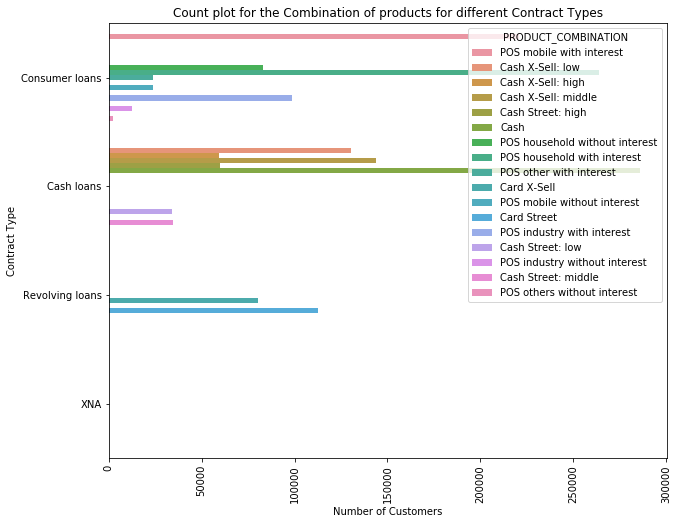

In [137]:
#Plotting countplot for PRODUCT_COMBINATION and NAME_CONTRACT_TYPE
plt.figure(figsize=(10,8))
sns.countplot(y='NAME_CONTRACT_TYPE', hue='PRODUCT_COMBINATION', data=df_previous)
plt.title("Count plot for the Combination of products for different Contract Types")
plt.xlabel("Number of Customers")
plt.ylabel("Contract Type")
plt.xticks(rotation=90)
plt.show()

#### POS mobile with interest, POS other with interest for consumer loans have higher number of customers. In Cash loan contract Cash product customers are higher in number. 

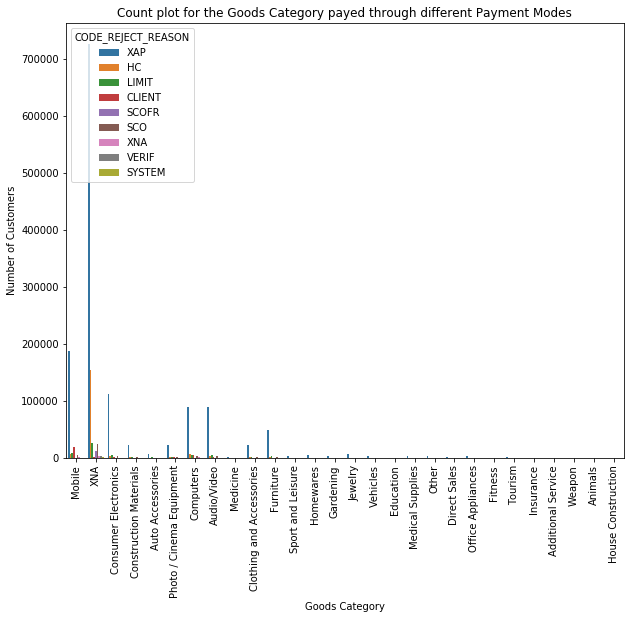

In [138]:
#Plotting countplot for CODE_REJECT_REASON and NAME_GOODS_CATEGORY
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_GOODS_CATEGORY', hue='CODE_REJECT_REASON', data=df_previous)
plt.title("Count plot for the Goods Category payed through different Payment Modes")
plt.xlabel("Goods Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

#### Most of the customers applied loan for various goods were rejected due to XAP.

#### Summary:
The data provided to us is regarding the bank loan applications and details regarding the previous application of the customers. 
From the various statistical and graphical approaches that we employed on the data we received a lot of insightful information. Amongst them the most important are:
1.	The Businessmen and the students have the least amount of default. 
2.	The loans provided to different customers are usually provided at different rates of interest. 
3.	There is a very significant relation between the income, age and the occupation of an individual with the amount of credit that the customer is provided with. 
4. Between the variables “amount of credit” and “amount of goods price“, there is a very high correlation. Which implies that with the growing amount of credit the amount of goods that are required to be kept as mortgage with the bank also increases. 
5. The highest number of loans are applied by customers who are from the mid-income group.
6. Within the age groups, the highest number defaults are from the Youth age group.
